<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/redesneuraisfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURAIS NO MERCADO DE AÇÕES

Vamos usar redes neurais para fazer previsões de ações da Petrobrás.

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Os pacotes *numpy* e *pandas* já vêm com a instalação do Anaconda. O *pandas_datareader*, bem como o tensorflow devem ser instalados pelo pip, no terminal.

Vamos ler os dados das ações da Petrobrás (ticker PETR4) pelo *DataReader*, do site da Yahoo. Devemos acrescentar a terminação *.SA* para leitura de ações negociadas na **B3**.

In [ ]:
data = wb.DataReader('PETR4.SA', data_source = 'yahoo', start = '2000-1-1')

In [ ]:
data.head() ### lendo as primeiras informações do data frame criado.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.538944e+10,3.812799
2000-01-04,5.550,5.550,5.550,5.550,2.886144e+10,3.601876
2000-01-05,5.494,5.494,5.494,5.494,4.303360e+10,3.565535
2000-01-06,5.475,5.475,5.475,5.475,3.405568e+10,3.553203
2000-01-07,5.500,5.500,5.500,5.500,2.091264e+10,3.569429


Vamos acrescentar ao data frame uma coluna com *resultados* . A coluna será calculada como a variação do valor ajustado entre um dia e o dia anterior.

In [ ]:
data['Resultado'] = (data['Adj Close']/data['Adj Close'].shift(1))-1 ### a função shift define a defasagem usada nessa diferenciação.
print(data['Resultado'])

Date
2000-01-03         NaN
2000-01-04   -0.055320
2000-01-05   -0.010090
2000-01-06   -0.003458
2000-01-07    0.004566
                ...   
2021-05-11    0.018219
2021-05-12   -0.014712
2021-05-13    0.008475
2021-05-14    0.051621
2021-05-17    0.014460
Name: Resultado, Length: 5368, dtype: float64


Agora faremos um gráfico dessa coluna de resultados. o argumento figsize permite definir o seu tamanho.

<AxesSubplot:xlabel='Date'>

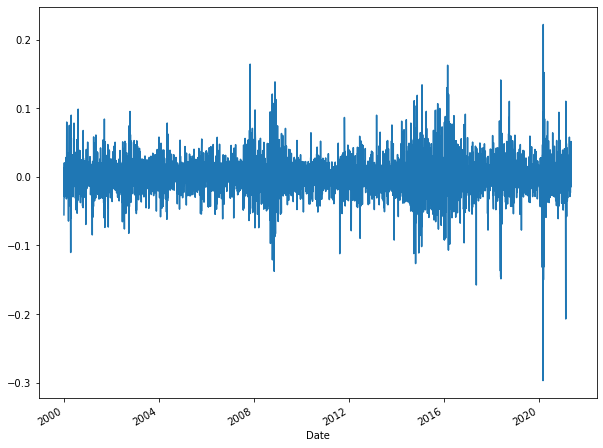

In [ ]:
data['Resultado'].plot(figsize = (10,8))

Como a série foi diferenciada, observa-se certa estacionariedade. Contudo, a variância não é constante.

In [ ]:
media = data['Resultado'].mean() ### calculando a média para todo o período (ou seja, cerca de 20 anos)
print(media)

0.0007320645302479214


In [ ]:
media_anual = data['Resultado'].mean()*250 ### considerando 250 úteis, calculamos a média anual.
print(media_anual)

0.18301613256198035


In [ ]:
print(str(round(media_anual, 5)*100) + '%') ### o valor em termos percentuais.

18.302%
